# Introduction to Pandas and Dataframes

*Alastair Buckley & Jamie Taylor*

*2020-11-03*

See Pandas website: https://pandas.pydata.org/about/index.html

*Pandas is a fast, powerful, flexible and easy to use open-source data analysis and manipulation tool, built on top of the Python programming language.*

The core component of Pandas is the DataFrame, which is essentially a table of data, but with access to sophisticated methods for data manipulation and vectorised mathematical operations.

## Install  relevant Python libraries and then import them

(Note that some of these libraries e.g. NumPy are already installed in Colab, but there's no harm in installing them again)

In [2]:
!pip install numpy scipy pandas>1.0 matplotlib seaborn
from datetime import datetime # Built-in library, useful fo working with dates and times
import numpy as np # NumPy == "Numerical Python", useful for working with numerical arrays (Pandas is built on top of NumPy)
import scipy # SciPy == "Scientific Python", builds on NumPy to provide statistical models etc
import pandas as pd # No idea why it's called Pandas 🤷‍♂️
import matplotlib.pyplot as plt # Matplotlib == "Matlab/Matrix Plotting Library", used for plotting graphs etc
import seaborn as sns # Seaborn is built on top of Matplotlib and produces much prettier graphs with less code

## Loading data

### Load some CSV (Comma-Separated-Variable) data into a DataFrame from GitHub

In [3]:
a = [2, 1, 3]
b = [3, 1, 4]
a*b

TypeError: ignored

### Load CSV data from Google Drive

First mount our Google Drive...

In [ ]:
from google.colab import drive # This module is only available in Google Colab
drive.mount('/content/drive', force_remount=True);

Mounted at /content/drive


... then load our CSV data...

(Note that since this is just an example, and in fact we've already successfully loaded the data from GitHub above, we will wrap the following code in a try/except clause so that if the file is not found in our GDrive, we print a warning but continue to execute the rest of the script)

In [ ]:
filename = "/content/drive/My Drive/all_cell_efficiency.csv"
try:
    eff2 = pd.read_csv(filename)
    print(eff2)
except FileNotFoundError:
    warnings.warn(f"The file '{filename}' was not found!")

    Measurement Date  Month  ...            Group(s) Efficiency / %
0             Feb-85      2  ...                ATEC           10.5
1             Dec-88     12  ...                UNSW           18.2
2             Jun-88      6  ...                ARCO           11.1
3             Jun-88      6  ...                ARCO            6.8
4             Apr-89      4  ...  Sandia/UNSW/ENTECH           20.3
..               ...    ...  ...                 ...            ...
135           May-19      5  ...           Panasonic           16.1
136           Apr-19      4  ...             Miasole           17.4
137           Oct-19     10  ...      Hanwha Q cells           20.4
138           Sep-19      9  ...         First Solar           19.0
139           Jan-20      1  ...           Panasonic           17.9

[140 rows x 6 columns]


## Plotting graphs

### Efficiency by group

Produce a boxplot of the `Efficiency / %` for each `Group(s)` category.

**Using Matplotlib**

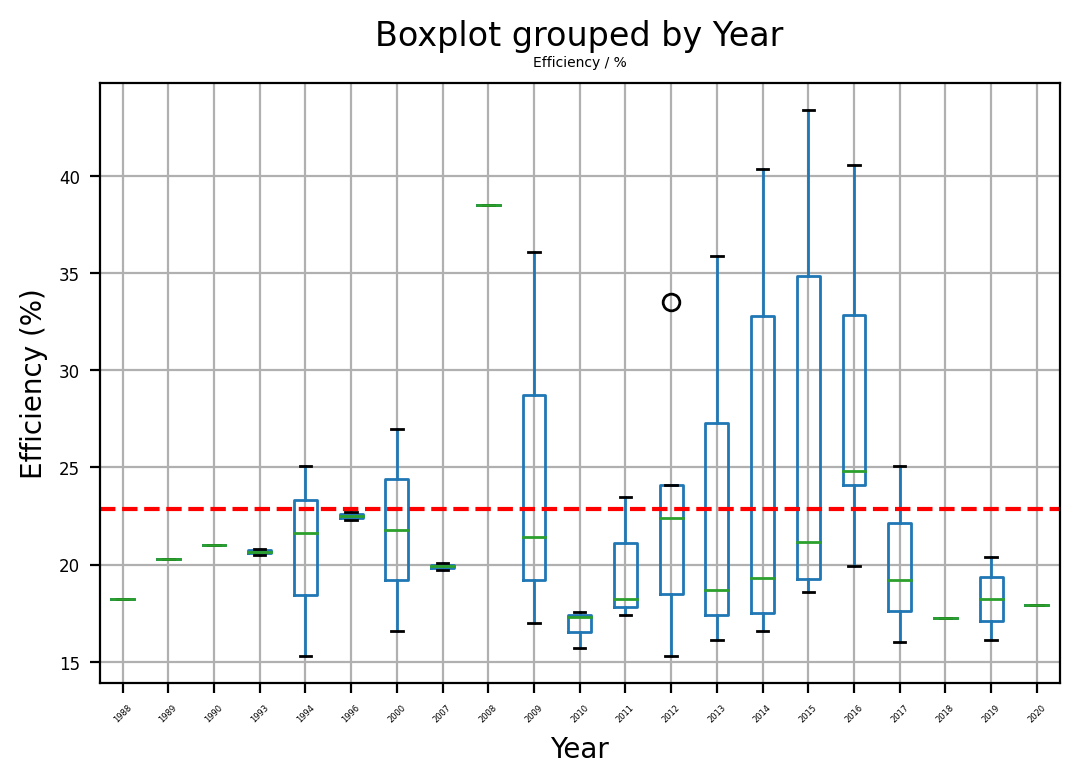

In [ ]:
# Global styling for our matplotlib plots (optional)
params = {
    'figure.dpi': 200, # Make plots bigger or smaller
    'axes.labelsize': 10, # Axes label font size
    'axes.titlesize': 5, # Title font size
    'xtick.labelsize': 3, # X axis tick labels font size
    'ytick.labelsize': 6 # Y axis tick labels font size
}
plt.rcParams.update(params)

# Create our own figure object (not strictly speaking necessary, but gives more flexibility later for changing labels etc)
fig1, ax1 = plt.subplots()

# Use Pandas object-oriented method to plot efficiency by Group
eff.boxplot(column="Efficiency / %", by="Year", ax=ax1, rot=45)

# Add a y-axis label
ax1.set_ylabel("Efficiency (%)");

# Add a horizontal line for the global mean
mean_eff = eff["Efficiency / %"].mean()
ax1.axhline(y=mean_eff, color='r', linestyle="--", label="Global Mean");

**Using Seaborn**

Matplotib is ugly and quite clunky, use seaborn for prettier default styling...

TypeError: ignored

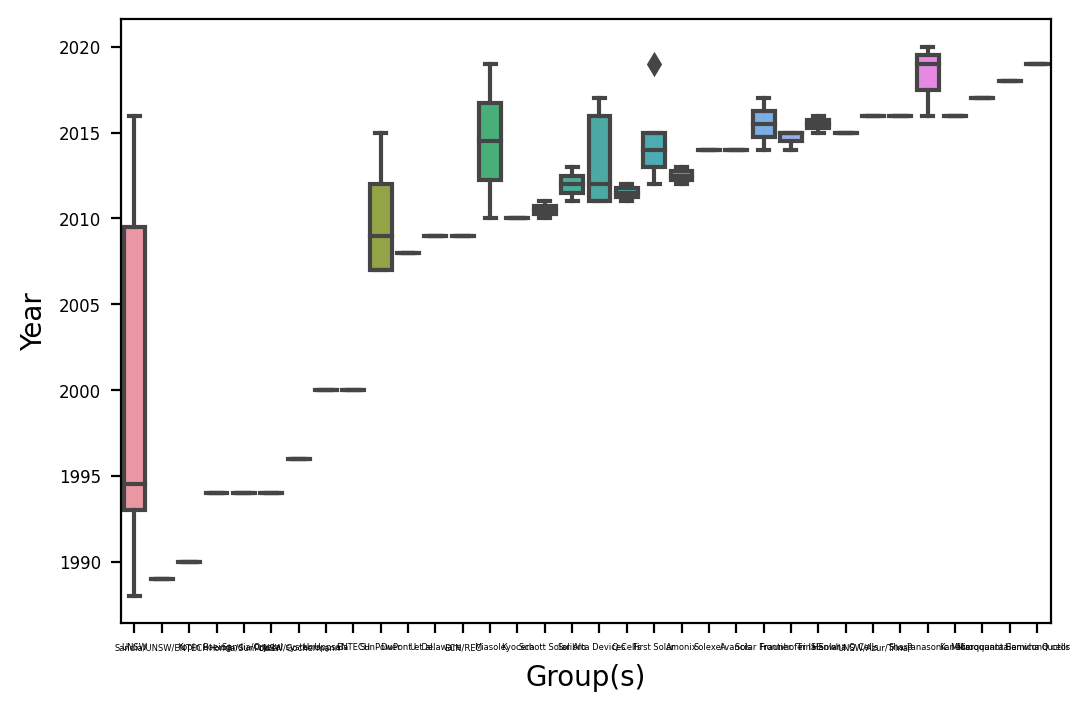

In [ ]:
# Produce a boxplot
ax2 = sns.boxplot(data=eff, x="Group(s)", y="Year")

# Add raw data as scatter points with jitter (a.k.a "swarmplot")
ax2 = sns.scatterplot(data=eff, x="Group(s)", y="Year", color="green", size=2)

# Rotate the x axis labels
# NOTE: Seaborn is built on top of Matplotlib, so it's possible to call Matplotlib methods on Seaborn axes
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45);

# Add a horizontal line for the global mean
mean_eff = eff["Year"].mean()
ax2.axhline(y=mean_eff, color='b', linestyle="--", label="Global Mean");

##Scatter plot of year versus efficiency

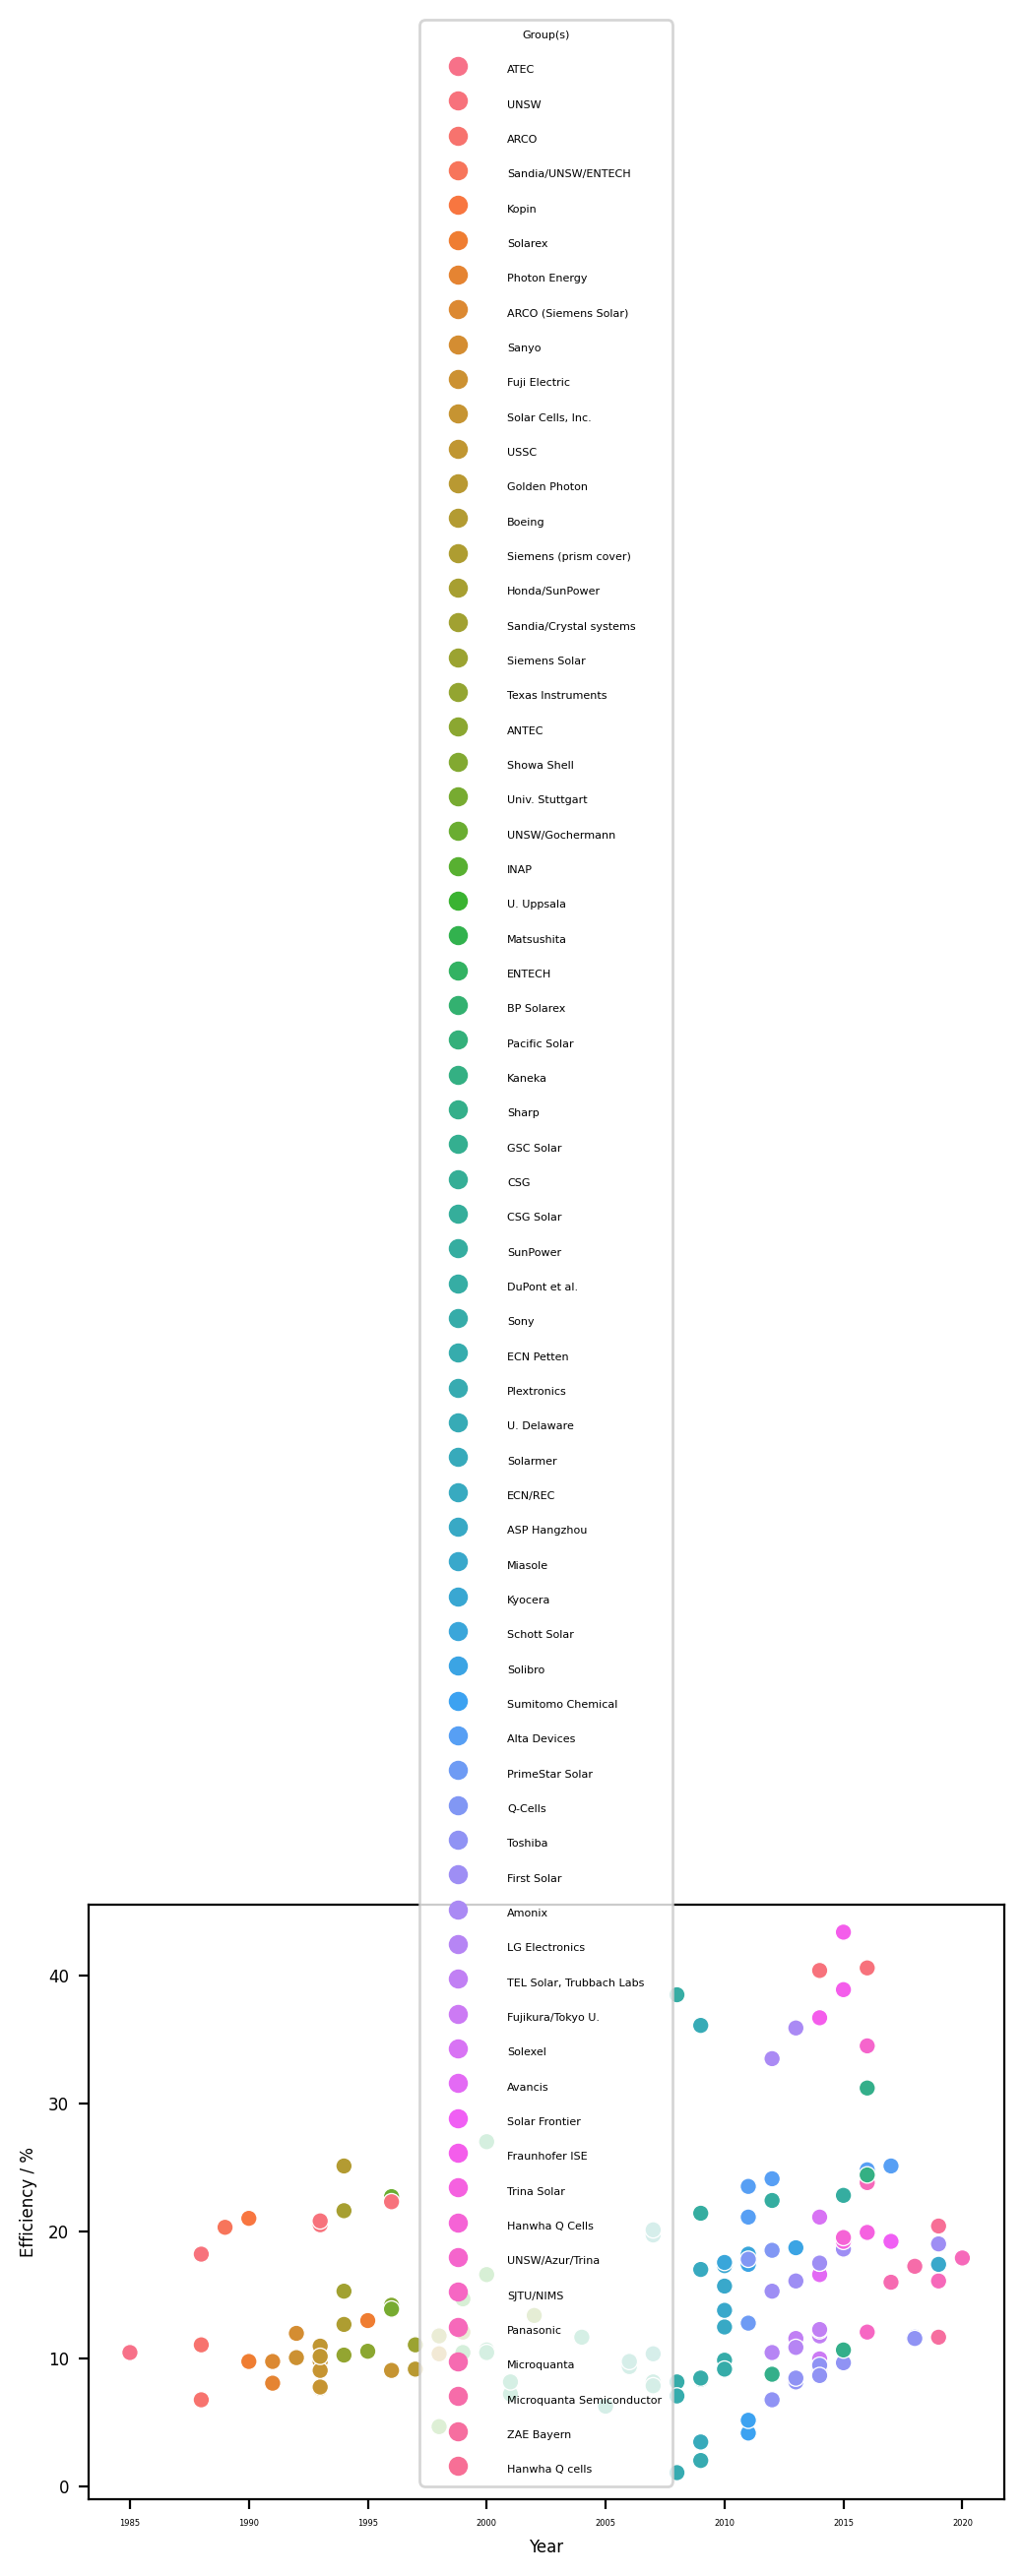

In [ ]:
#eff_plot = sns.scatterplot(data=eff, x="Year", y="Efficiency / %", hue = "Group(s)", legend = True)
ax3 = sns.scatterplot(x="Year", y="Efficiency / %", hue="Group(s)", data=eff)
plt.setp(ax3.get_legend().get_texts(), fontsize='4'); # for legend text
plt.setp(ax3.get_legend().get_title(), fontsize='4'); # for legend title